In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

#code diatas merupakan library yang akan digunakan

ModuleNotFoundError: No module named 'pandas'

In [3]:
#Import data dari file dataTesting.csv yang disimpan dalam variabel df_testing
df_testing = pd.read_csv("dataTesting.csv")

# melihat 5 baris pertama dari data testing
df_testing.head()

,Nama,IPS 1,IPS 2,IPS 3,IPS 4,Jenis Kelamin,Lulus Cepat
0,Mufinella Blazek,2.343637,1.315313,1.044425,1.705971,Female,0
1,Evin Luno,1.451169,1.063575,3.132815,1.279013,Male,0
2,Kelila Barney,2.524887,2.790770,1.226394,1.224447,Female,0
3,Skipper Lancastle,1.053466,1.765712,2.779840,2.731248,Male,0
4,Helge Wheadon,1.614096,1.090709,1.771071,3.911266,Female,0


In [4]:
# membersihkan data yang tidak dapat dilakukan dalam perhitungan
# x_testing merupakan variable independent yang akan dijadikan pertimbangan dalam prediksi

x_testing = df_testing.drop(["Lulus Cepat", "Jenis Kelamin", "Nama"], axis=1)
x_testing.head()

,IPS 1,IPS 2,IPS 3,IPS 4
0,2.343637,1.315313,1.044425,1.705971
1,1.451169,1.063575,3.132815,1.279013
2,2.524887,2.790770,1.226394,1.224447
3,1.053466,1.765712,2.779840,2.731248
4,1.614096,1.090709,1.771071,3.911266


In [5]:
# y_testing merupakan variable dependent yang atau target yang akan dicari hasil prediksinya
y_testing = df_testing["Lulus Cepat"]
y_testing.head()

0    0
1    0
2    0
3    0
4    0
Name: Lulus Cepat, dtype: int64

In [ ]:
# CLASSIFICATION

In [6]:
# sklearn merupakan package yg digunakan untuk klasifikasi naive bayes
# dalam pengklasifikasian ini membutuhkan data testing dan data training
x_train, x_test, y_train, y_test = train_test_split(x_testing, y_testing, test_size=0.2) #80% Training, 20% Testing
#x_train, x_test, y_train, y_test = train_test_split(x_testing, y_testing, test_size=0.3) #70% Training, 30% Testing
#x_train, x_test, y_train, y_test = train_test_split(x_testing, y_testing, test_size=0.5) #50% Training, 50% Testing

In [7]:
# GaussianNB merupakan fungsi klasifikasi naive bayes dengan memasukkan data training 
nbModel = GaussianNB()

# menginputkan data training pada fungsi klasifikasi naive bayes
nbTrain = nbModel.fit(x_train, y_train)

In [8]:
# menentukan hasil prediksi dari data testing yang disimpan dalam variable x_test
# hasil prediksi berupa array dengan penjelasan 0 = lulus lambat, dan 1 = lulus cepat
y_pred = nbTrain.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0])

In [9]:
# Confusion matrix merupakan matriks yang berisi ketepatan prediksi.
cm = confusion_matrix(y_test, y_pred)
cm

array([[5, 0],
       [1, 1]])

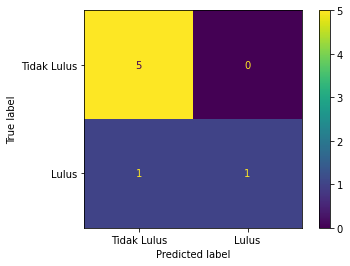

In [13]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Tidak Lulus', 'Lulus'])

cm_display.plot()
plt.show() 

In [14]:
# bentuk lain dari confussion matrix
y_actual = pd.Series(np.array(y_test), name="actual")
y_predict = pd.Series(y_pred, name="prediction")
df_confusion = pd.crosstab(y_actual, y_predict)
df_confusion

prediction,0,1
actual,,
0,5,0
1,1,1


In [15]:
# Classification Report

# menampilkan tingkat akurasi dari naive bayes
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.50      0.67         2

    accuracy                           0.86         7
   macro avg       0.92      0.75      0.79         7
weighted avg       0.88      0.86      0.84         7



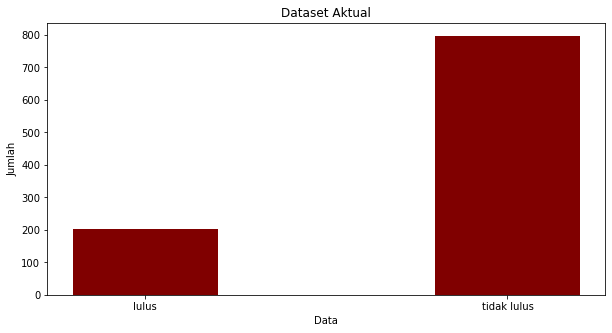

In [30]:
dat = { 'y_actual': len(y_actual), 'y_predict': len(y_predict) }

dats = list(data2.keys())
jml = list(data2.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(dats, jml, color ='maroon',
        width = 0.4)
 
plt.xlabel("Data")
plt.ylabel("Jumlah")
plt.title("Dataset Aktual")
plt.show()


In [ ]:
# setelah melakukan testing, selanjutnya adalah memprediksi berdasarkan data yang dimiliki

In [20]:
# Import data yang akan diprediksi
df = pd.read_csv("MOCK_DATA.csv")
df.head()

,Nama,IPS 1,IPS 2,IPS 3,IPS 4,Jenis Kelamin
0,Ashlan Allicock,2.777976,1.679349,3.267783,2.479794,Female
1,Hunter Medgwick,1.245262,3.488727,3.203149,2.338524,Male
2,Rafi Pavlovsky,1.544243,3.590717,3.533281,3.365912,Male
3,Cherin Cowl,2.521820,1.212801,3.834831,2.658451,Female
4,Mufinella Blazek,2.343637,1.315313,1.044425,1.705971,Female


In [22]:
# melakukan preprocessing data yg akan diprediksi
data = df
data_pred = data.drop(["Jenis Kelamin", "Nama"], axis=1)
data_pred.head()

,IPS 1,IPS 2,IPS 3,IPS 4
0,2.777976,1.679349,3.267783,2.479794
1,1.245262,3.488727,3.203149,2.338524
2,1.544243,3.590717,3.533281,3.365912
3,2.521820,1.212801,3.834831,2.658451
4,2.343637,1.315313,1.044425,1.705971


In [23]:
# menentukan hasil prediksi menggunakan naive bayes berdasarkan testing sebelumnya
predict = nbTrain.predict(data_pred)

# menampilkan hasil prediksi Lulus Cepat
predict


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,

In [31]:
print('Jumlah y_testing: ',len(y_testing))
print('Jumlah prediksi: ',len(predict))

Jumlah y_testing:  33
Jumlah prediksi:  1000


jumlah data tidak lulus:  797
jumlah data lulus:  203


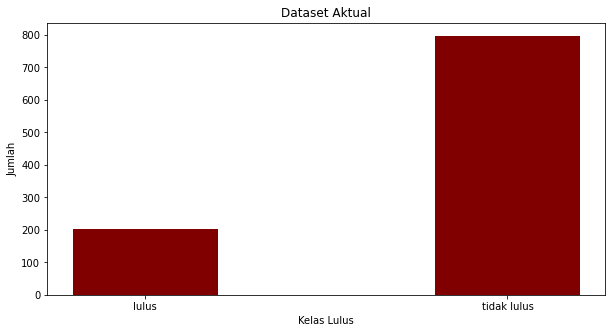

In [25]:
zero = []
one = []

for i in predict:
    if i == 0:
        zero.append(i)
    else: one.append(i)

len_zero = 0
len_one = 0

for i in zero:
    len_zero = len_zero +1
print('jumlah data tidak lulus: ',str(len_zero))

for i in one:
    len_one = len_one +1
print('jumlah data lulus: ',str(len_one))


data2 = { 'lulus': len_one, 'tidak lulus': len_zero }

dat = list(data2.keys())
jml = list(data2.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(dat, jml, color ='maroon',
        width = 0.4)
 
plt.xlabel("Kelas Lulus")
plt.ylabel("Jumlah")
plt.title("Dataset Aktual")
plt.show()

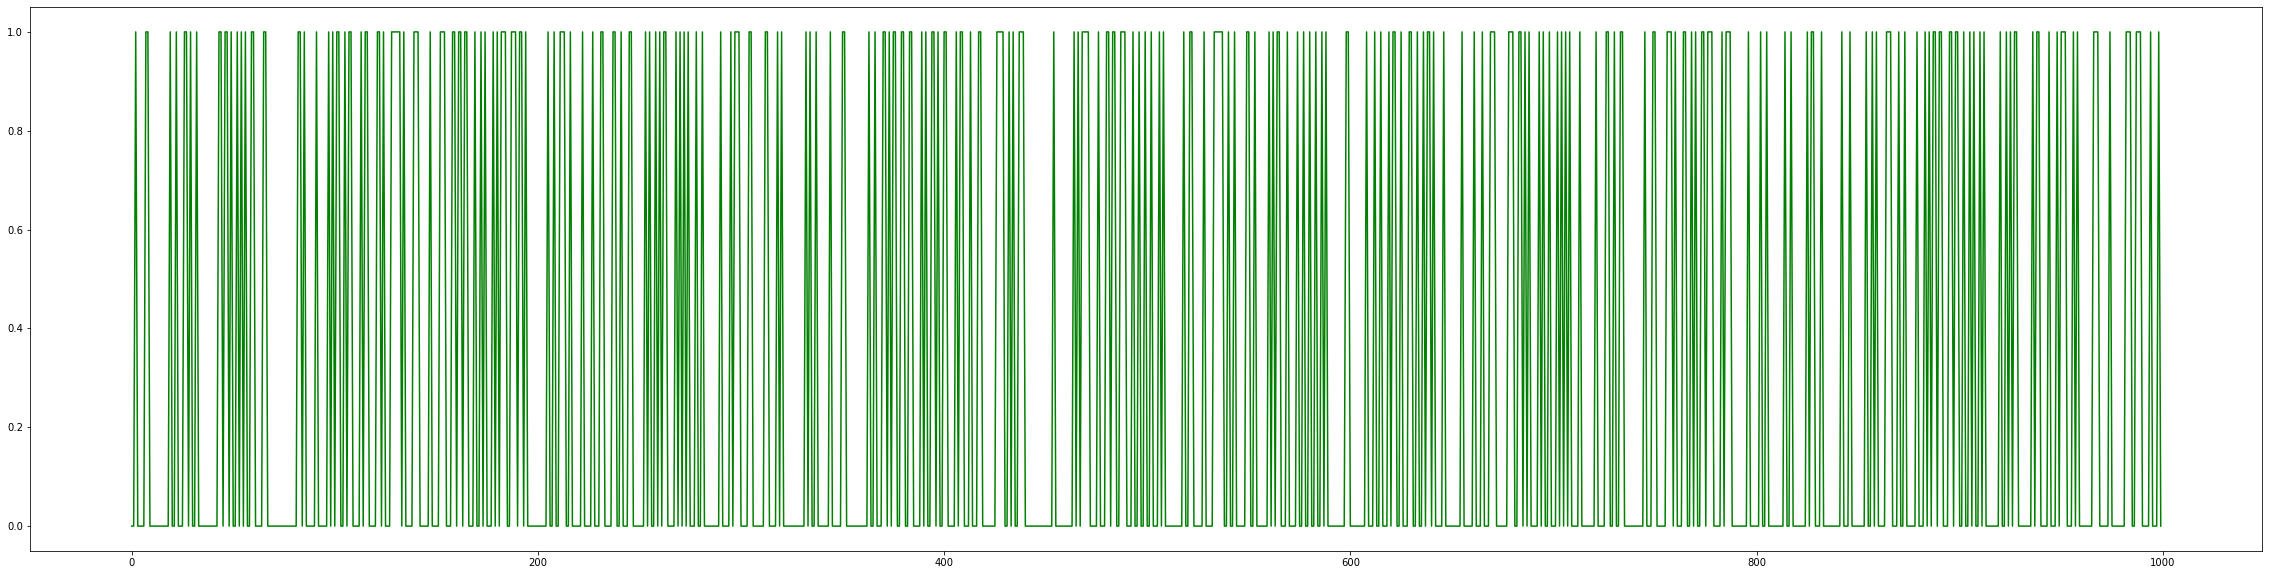

In [71]:
#plt.title("Line graph")
#plt.xlabel("X axis")
#plt.ylabel("Y axis")
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(10)
plt.plot(predict, color ="green")
plt.show()



In [55]:
# membuat data frame untuk menyimpan hasil prediksi
hasilPredict = pd.DataFrame()

# menambahkan coloumn nama yang diambil dari data asli pada coloumn Nama
hasilPredict["Nama"] = df["Nama"]

# menggabungkan data frame hasil prediksi (yg sebelumnya masih hanya berisi coloumn nama) dengan data yg diprediksi
hasilPredict = pd.concat([hasilPredict,data_pred], axis=1)

# menambahkan coloumn "Prediksi Lulus Cepat" dari hasil prediksi yg sudah ditentukan
hasilPredict["Prediksi Lulus Cepat"] = predict

# Menampilkan 5 baris pertama hasil prediksi
hasilPredict.head()

,Nama,IPS 1,IPS 2,IPS 3,IPS 4,Prediksi Lulus Cepat
0,Ashlan Allicock,2.777976,1.679349,3.267783,2.479794,0
1,Hunter Medgwick,1.245262,3.488727,3.203149,2.338524,0
2,Rafi Pavlovsky,1.544243,3.590717,3.533281,3.365912,1
3,Cherin Cowl,2.521820,1.212801,3.834831,2.658451,0
4,Mufinella Blazek,2.343637,1.315313,1.044425,1.705971,0


In [ ]:
# Hasil prediksi 0=tidak lulus cepat, dan 1=lulus cepat

In [31]:
# menampilkan seluruh hasil prediksi
hasilPredict

,Nama,IPS 1,IPS 2,IPS 3,IPS 4,Prediksi Lulus Cepat
0,Ashlan Allicock,2.777976,1.679349,3.267783,2.479794,0
1,Hunter Medgwick,1.245262,3.488727,3.203149,2.338524,0
2,Rafi Pavlovsky,1.544243,3.590717,3.533281,3.365912,0
3,Cherin Cowl,2.521820,1.212801,3.834831,2.658451,0
4,Mufinella Blazek,2.343637,1.315313,1.044425,1.705971,0
...,...,...,...,...,...,...
995,Deeann Gurnett,2.705496,1.299231,1.237263,2.988796,0
996,Claude Steagall,1.685797,3.082942,2.903086,1.226993,0
997,Jennilee Bruhke,1.122952,1.984153,3.130307,2.665605,0
998,Ruby McCumesky,3.052619,2.440473,3.357298,3.676477,1
